<a href="https://colab.research.google.com/github/finardi/WatSpeed_LLM_foundation/blob/main/Module2%3A%20Fine_tuning_BERT_for_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 2 - fine-tuning BERT for sentiment analysis

This notebook presents an example of **how to fine-tune** a BERT model to perform sentiment analysis. Sentiment analysis, also referred to as opinion mining, is a type of text classification task in Natural Language Processing (NLP) that involves categorizing a piece of text, typically a sentence or a document, into predefined sentiment categories, such as positive, negative, or neutral.


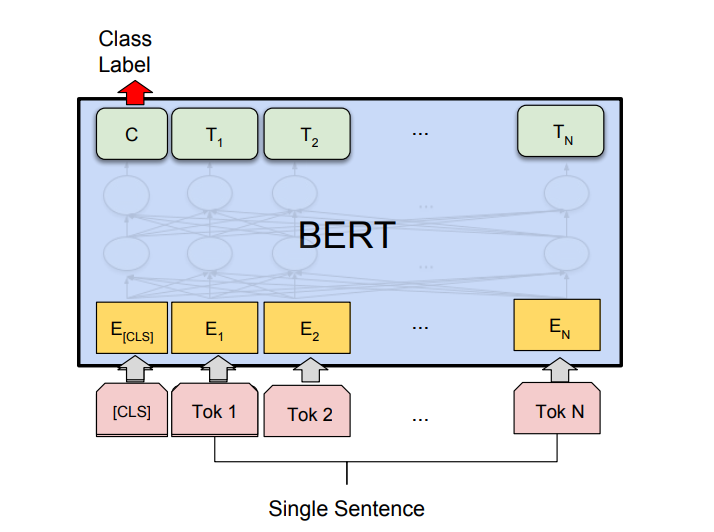

BERT is a powerful deep learning model pre-trained on massive amounts of text data. BERT is a type of transformer-based architecture that can capture the meaning of a sentence by considering the context in which each word appears.

We can fine-tune a pre-trained BERT model on a labeled sentences dataset with their corresponding sentiment categories to use BERT for sentence classification. The fine-tuning process involves training the BERT model on our specific task by feeding it our labeled dataset and adjusting its parameters to improve its performance.

**In this example, we fine-tune BERT-base model on the Stanford Sentiment Treebank (SST-2)**. The model and the dataset are available online:
* [bert-base-uncased](https://huggingface.co/bert-base-uncased)
* [Dataset](https://huggingface.co/datasets/glue/viewer/sst2/test)

# Installing required packages

In this example, we have to install two libraries:  `transformers` and `datasets`, both from Hugging Face. [Hugging Face](https://huggingface.co/) is an AI startup that has gained significant traction in the NLP community recently. It provides a suite of open-source tools and libraries, making it easy for developers and researchers to work with state-of-the-art NLP models.

**`transformers`**:

Transformers is an open-source library for NLP developed by Hugging Face. It provides state-of-the-art pre-trained models for various NLP tasks, such as text classification, sentiment analysis, question-answering, named entity recognition, etc. The library is built on top of PyTorch and TensorFlow and provides easy-to-use interfaces to access pre-trained models and fine-tune them on specific tasks. The library also provides tools for training custom models and sharing them with the community.

**`datasets`**:

Datasets is another open-source library developed by Hugging Face that provides a collection of preprocessed datasets for various NLP tasks, such as sentiment analysis, natural language inference, machine translation, and many more. The library provides a unified API to access these datasets, making it easy to load, process, and analyze them.

In [ ]:
!pip install transformers
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 24.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 64.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 10.8 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 23.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 22.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 20.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 12.5 MB/s eta 0:00:0

# Setting the device

In this example, we will use a GPU to speed up the processing of our model. GPUs (Graphics Processing Units) are specialized processors that are optimized for performing large-scale computations in parallel. By using a GPU, we can accelerate the training and inference of a machine learning model, which can significantly reduce the time required to complete these tasks.

Before we begin, we need to check whether a GPU is available and select it as the default device for our PyTorch operations. This is because PyTorch can use either a CPU or a GPU to perform computations, and by default, it will use the CPU. 

For using a GPU in Google Colab: 
1. Click on the "Runtime" menu at the top of the screen.
2. From the dropdown menu, click on "Change runtime type".
3. In the popup window that appears, select "GPU" as the hardware accelerator.
4. Click on the "Save" button.

That's it! Now you can use the GPU for faster computations in your notebook. 

In [ ]:
!nvidia-smi

Tue May  9 12:45:39 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import torch

if torch.cuda.is_available(): 
   dev = "cuda:0"
else: 
   dev = "cpu"
device = torch.device(dev)
print('Using {}'.format(device))

Using cuda:0


# Downloading Dataset

The SST-2 dataset, or the Stanford Sentiment Treebank, is popular for sentiment analysis tasks in Natural Language Processing (NLP). It consists of movie reviews from the Rotten Tomatoes website that are labeled with either a positive or negative sentiment. The dataset contains 10,662 sentence-level movie reviews, with approximately half of the reviews labeled as positive and the other half labeled as negative. The reviews are also relatively evenly distributed in length, with a median length of 18 tokens.

The SST-2 dataset has become a benchmark dataset for sentiment analysis in NLP, and many researchers use it to evaluate the performance of their models. The dataset's popularity is partly due to its high-quality labels and the task's relative simplicity, making it an accessible starting point for researchers and developers new to NLP.

In this example, we're using the **`datasets`** library to download and load the validation set of the dataset.

In [ ]:
from datasets import load_dataset

train_dataset = load_dataset('sst2', split='train[:100]')
val_dataset = load_dataset('sst2', split='validation')

Generating train split:   0%|          | 0/67349 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/872 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1821 [00:00<?, ? examples/s]

Dataset sst2 downloaded and prepared to /root/.cache/huggingface/datasets/sst2/default/2.0.0/9896208a8d85db057ac50c72282bcb8fe755accc671a57dd8059d4e130961ed5. Subsequent calls will reuse this data.


The code below prepare the dataset for fine-tuning. Firstly, we map the 'label' column to a new column named 'labels' using the **`map()`** method, which is required for evaluation. Then, we remove the 'label' column using the **`remove_columns()`** method to ensure that the validation set has only the input sequences and the associated labels that the model is supposed to predict during evaluation.

In [ ]:
train_dataset = train_dataset.map(lambda examples: {'labels': examples['label']}, batched=True)
val_dataset = val_dataset.map(lambda examples: {'labels': examples['label']}, batched=True)

train_dataset = train_dataset.remove_columns(['label'])
val_dataset = val_dataset.remove_columns(['label'])

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:   0%|          | 0/872 [00:00<?, ? examples/s]

In this code, we use the **`pandas`** library to import the SST-2 dataset and show the first 10 examples using the **`df.head(10)`** method. The dataset contains examples labeled as either 0 or 1, representing negative and positive, respectively. For instance, the first example is labeled as 1, which means it is a positive example. It reads "it's a charming and often affecting journey," while the second example is labeled as 0, meaning it is a negative example. It reads "unflinchingly bleak and desperate." This way, you can have a quick overview of the dataset and its labeling.

In [ ]:
import pandas as pd

df = pd.DataFrame(train_dataset)
df.head(10)

,idx,sentence,labels
0,0,hide new secretions from the parental units,0
1,1,"contains no wit , only labored gags",0
2,2,that loves its characters and communicates som...,1
3,3,remains utterly satisfied to remain the same t...,0
4,4,on the worst revenge-of-the-nerds clichés the ...,0
5,5,that 's far too tragic to merit such superfici...,0
6,6,demonstrates that the director of such hollywo...,1
7,7,of saucy,1
8,8,a depressed fifteen-year-old 's suicidal poetry,0
9,9,are more deeply thought through than in most `...,1


# Downloading the model

We utilize the **`transformers`** library to load the pre-trained BERT model. In this example, we are using two classes from the **`transformers`** library: **`BertTokenizer`** and **`BertForSequenceClassification`**.

The **`BertTokenizer`** class is used to tokenize input text data in preparation for use with the BERT model. It is instantiated with a pre-trained tokenizer, in this case "`bert-base-uncased`", trained on the lower-cased English text. The **`BertForSequenceClassification`** class is used to load a pre-trained BERT model, in this case "`bert-base-uncased`".

In [ ]:
from transformers import BertForSequenceClassification, BertTokenizer,BertConfig

model = BertForSequenceClassification.from_pretrained('bert-base-uncased')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

# Model Fine-tuning

## Data preparation

To fine-tune BERT for sentiment analysis, we use the SST-2 dataset as a benchmark. Before training, we need to prepare the dataset by tokenizing the data and converting it to a format that can be processed by the model.

To tokenize the dataset, we use the tokenizer to encode the input sequences. We then convert the tokenized data to the torch format, which is a format that can be processed by PyTorch, a popular machine learning framework. 

The code provided below applies the tokenizer to each sentence in the dataset and sets the padding and truncation parameters to ensure that each sentence is of equal length. The resulting tokenized data is then converted to the torch format, with the **`input_ids`**, **`token_type_ids`**, **`attention_mask`**, and **`labels`** columns being specified. This format is suitable for feeding into the fine-tuned BERT model for inference and evaluating its performance on the test dataset.

In [ ]:
MAX_LENGTH = 128
train_dataset = train_dataset.map(lambda e: tokenizer(e['sentence'], truncation=True, padding='max_length', max_length=MAX_LENGTH), batched=True)
val_dataset = val_dataset.map(lambda e: tokenizer(e['sentence'], truncation=True, padding='max_length', max_length=MAX_LENGTH), batched=True)

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:   0%|          | 0/872 [00:00<?, ? examples/s]

The **`set_format()`** method is called on the dataset object to convert the dataset to the PyTorch tensor format, which is required by the BERT model.

The columns argument specifies which columns in the dataset should be included in the PyTorch format. In this case, the **`input_ids`**, **`token_type_ids`**, **`attention_mask`**, and **`labels`** columns are included. These columns correspond to the inputs and labels that the BERT model expects for sequence classification tasks.

In [ ]:
train_dataset.set_format(type='torch', columns=['input_ids', 'token_type_ids', 'attention_mask', 'labels'])
val_dataset.set_format(type='torch', columns=['input_ids', 'token_type_ids', 'attention_mask', 'labels'])

## Compute metrics
In the cell below, we define the function we will use for computing the metrics during the fine-tuning process.

The function is called **`compute_metrics`** and takes in one argument, **`pred`**, which is a named tuple containing the predicted labels and the true labels for a batch of inputs.

First, we extract the true labels from **`pred`** using **`pred.label_ids`** and the predicted labels using **`pred.predictions.argmax(-1)`**. The **`.argmax(-1)`** method is used to select the class with the highest probability for each input sequence in the batch.

Next, we use the **`precision_recall_fscore_support`** function from the **`sklearn.metrics`** library to compute the precision, recall, and F1 score for the predicted and true labels. The **`average='macro'`** parameter specifies that we want to compute the macro-average of the precision, recall, and F1 score. This means that we compute the precision, recall, and F1 score for each class separately and then take the unweighted mean of the scores.

Finally, we use the **`accuracy_score`** function from the **`sklearn.metrics`** library to compute the accuracy of the predicted labels compared to the true labels.

The function returns a dictionary containing the computed metrics, which includes the accuracy, F1 score, precision, and recall. These metrics are commonly used to evaluate the performance of classification models in natural language processing tasks.

In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='macro')
    acc = accuracy_score(labels, preds)
    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }

## Training

In this section, we perform the training step of the fine-tuning process. The code below defines several hyperparameters and settings that will be used during training.

**`BATCH_SIZE`**: This variable sets the size of each batch during training. A larger batch size can increase the speed of training, but it requires more memory. See more about how to determine the right batch size [here](https://medium.com/data-science-365/determining-the-right-batch-size-for-a-neural-network-to-get-better-and-faster-results-7a8662830f15).

**`NUMBER_OF_EPOCHS`**: This variable sets the number of times the entire dataset will be iterated during training. One epoch is completed when all batches in the dataset have been processed. For our example, 5 epochs are enough for achieving good results, but you can try training for more time and see the impact.

**`LEARNING_RATE`**: This variable sets the learning rate for the optimizer used during training. The learning rate determines how much the weights of the model are updated during training. A high learning rate can cause the model to converge too quickly and potentially miss the optimal solution, while a low learning rate can cause slow convergence or prevent the model from finding a good solution. Read more about how to choose the learning rate [here](https://www.baeldung.com/cs/ml-learning-rate#how-to-choose-the-learning-rate).

**`LOGS_DIR`**: This variable sets the directory where logs will be stored during training. The logs can include information such as loss and accuracy values, and can be used to monitor the progress of training.

**`GRADIENT_ACCUMULATION_STEPS`**: This variable sets the number of batches to accumulate gradients before taking an optimizer step. This can be used to simulate larger batch sizes and reduce memory usage.

**`USE_FP16`**: This variable enables the use of mixed precision training, which can speed up training by using lower precision floating-point numbers for certain calculations while maintaining the same level of accuracy.

**`OUTPUT_DIR`**: This variable is set to the directory where the fine-tuned model will be saved. In this case, the directory is "./bert-base-sst-2". The name of the directory includes "bert-base-sst-2", which is the name of the pre-trained BERT model that is being fine-tuned on the SST-2 dataset. The fine-tuned model will be saved in this directory with the name **`pytorch_model.bin`**.



In [ ]:
BATCH_SIZE = 160
NUMBER_OF_EPOCHS = 3
LEARNING_RATE = 1e-4
LOGS_DIR= "./logs"
GRADIENT_ACCUMULATION_STEPS = 4
USE_FP16 = True
OUTPUT_DIR = "./bert-base-sst-2"

The code below defines a TrainingArguments object that will be used to configure the fine-tuning process. 

- `output_dir` specifies the directory where the fine-tuned model will be saved. 
- `learning_rate` sets the learning rate of the optimizer. 
- `num_train_epochs` specifies the number of epochs to train the model. 
- `per_device_train_batch_size` sets the batch size per device during training. 
- `per_device_eval_batch_size` sets the batch size for evaluation. 
- `logging_dir` sets the directory where the training logs will be stored. 
- `logging_steps` specifies how often the logs will be printed during training. 
- `do_train` and `do_eval` are boolean flags indicating whether to perform training and evaluation, respectively. 
- `no_cuda` is a boolean flag indicating whether to use the GPU for training. 
- `load_best_model_at_end` is a boolean flag indicating whether to load the best model at the end of training. 
- `evaluation_strategy` sets how often to perform evaluation during training. In this case, we evaluate at the end of each epoch. 
- `save_strategy` sets how often to save the model during training. In this case, we save at the end of each epoch. 
- `fp16` is a boolean flag indicating whether to use mixed precision training, which can reduce memory usage and speed up training. 
- `gradient_accumulation_steps` specifies how many gradient accumulation steps to perform before backpropagating the gradients. 
- `metric_for_best_model` specifies which metric to use to determine the best model. In this case, we use accuracy.

In [ ]:
from transformers import TrainingArguments

training_args = TrainingArguments(
    output_dir=OUTPUT_DIR,
    learning_rate=LEARNING_RATE,
    num_train_epochs=NUMBER_OF_EPOCHS,              
    per_device_train_batch_size=BATCH_SIZE,                #batch size per device during training
    per_device_eval_batch_size=BATCH_SIZE,                #batch size for evaluation
    logging_dir=LOGS_DIR,            
    logging_steps=100,
    do_train=True,
    do_eval=True,
    no_cuda=False,
    load_best_model_at_end=True,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    fp16=USE_FP16,
    gradient_accumulation_steps=GRADIENT_ACCUMULATION_STEPS,
    metric_for_best_model='accuracy'
)

This code belows defines the **`Trainer`** object from the **`transformers`** library that will be used to fine-tune the pre-trained BERT model on the SST-2 dataset. 

The **`Trainer`** takes in several parameters:

- **`model`**: the BERT model we want to fine-tune
- **`args`**: the training arguments defined earlier, which specify how we want to fine-tune the model
- **`train_dataset`**: the dataset containing the training examples
- **`eval_dataset`**: the dataset containing the validation examples
- **`compute_metrics`**: the function that computes the evaluation metrics for the model during training

With these parameters, the **`Trainer`** object is ready to be used to fine-tune the BERT model on the SST-2 dataset.

In [ ]:
from transformers import Trainer

trainer = Trainer(
    model=model,                         
    args=training_args,                  
    train_dataset=train_dataset,         
    eval_dataset=val_dataset,            
    compute_metrics=compute_metrics
)

The **`trainer.train()`** method is used to train the model on the provided training dataset for the specified number of epochs and other training arguments specified in ***training_args***.

When **`trainer.train()`** is executed, the training will start and progress will be displayed in the output cell. The output will show the current epoch, the current step, the current learning rate, and the training loss. 

At the end of the training, the **`train()`** method will return a **`TrainOutput`** object which contains the global step, training loss, and other metrics collected during training.





In [ ]:
train_out = trainer.train()

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
0,0.237100,0.209090,0.917431,0.917333,0.918033,0.917109


You can save the best model from the trainer using the **`save_model()`** method of the **`Trainer`** class. This method saves the model and the associated tokenizer to the specified directory.



In [ ]:
FINAL_MODEL_DIR = './my-bert-base-sst2'
trainer.save_model(FINAL_MODEL_DIR)

## Looking inside the training loop

**The execution of the cell below is optional.**

It shows an example of how you can do the fine-tuning of BERT using a loop, without using Hugging Face's Trainer.

In this code, we first define the optimizer and then loop over the epochs. For each epoch, we loop over the batches in the training dataset, compute the loss and gradients, and update the parameters of the model using the optimizer. After training on the entire training dataset, we evaluate the model on the validation dataset by looping over the batches and computing the accuracy. Finally, we print the average train loss and eval accuracy for the epoch.


In [ ]:
%%script echo skipping 
# If you want to run this cell, remove the line above.


# Importing the necessary libraries and initializing the optimizer
from transformers import AdamW
from torch.utils.data import DataLoader
from tqdm import tqdm

optimizer = AdamW(model.parameters(), lr=LEARNING_RATE) # Initialize the optimizer


# Moving the model to the appropriate device (GPU or CPU)
model.to(device)

for epoch in range(NUMBER_OF_EPOCHS): # Loop over the epochs
    
    # Training phase
    train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
    model.train() # Set the model to train mode
    total_loss = 0.0 # Initialize the total loss
    for batch in tqdm(train_loader): # Loop over the batches
        optimizer.zero_grad() # Reset the gradients
        inputs = batch['input_ids'].to(device) # Move the inputs to the appropriate device
        attention_mask = batch['attention_mask'].to(device) # Move the attention mask to the appropriate device
        labels = batch['labels'].to(device) # Move the labels to the appropriate device
        outputs = model(inputs, attention_mask=attention_mask, labels=labels) # Compute the outputs and the loss
        loss = outputs.loss # Extract the loss
        loss.backward() # Compute the gradients
        total_loss += loss.item() # Accumulate the loss
        optimizer.step() # Update the weights
        
    avg_train_loss = total_loss / len(train_loader) # Compute the average loss
    print(f"Epoch {epoch+1} - average train loss: {avg_train_loss}")
    
    # Evaluation phase
    eval_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)
    model.eval() # Set the model to eval mode
    total_eval_accuracy = 0.0 # Initialize the total accuracy
    for batch in tqdm(eval_loader):
        inputs = batch['input_ids'].to(device) # Move the inputs to the appropriate device
        attention_mask = batch['attention_mask'].to(device) # Move the attention mask to the appropriate device
        labels = batch['labels'].to(device) # Move the labels to the appropriate device
        with torch.no_grad():
            outputs = model(inputs, attention_mask=attention_mask, labels=labels) # Compute the outputs
        logits = outputs.logits # Extract the logits
        preds = torch.argmax(logits, dim=1) # Extract the predictions
        total_eval_accuracy += torch.sum(preds == labels) # Accumulate the accuracy
    avg_eval_accuracy = total_eval_accuracy / len(val_dataset) # Compute the average accuracy
    print(f"Epoch {epoch+1} - average eval accuracy: {avg_eval_accuracy}")


## Model Evaluation

We can use the **`evaluate`** method of the **`trainer`** object to evaluate the performance of our fine-tuned model on a validation dataset. This method takes in the validation dataset as input, and returns a dictionary containing the evaluation metrics such as loss, accuracy, and F1 score.

In [ ]:
trainer.evaluate(val_dataset)

{'eval_loss': 0.20909017324447632,
 'eval_accuracy': 0.9174311926605505,
 'eval_f1': 0.9173333473779566,
 'eval_precision': 0.91803261396958,
 'eval_recall': 0.9171086974825293,
 'eval_runtime': 1.6581,
 'eval_samples_per_second': 525.896,
 'eval_steps_per_second': 3.619,
 'epoch': 1.0}

We can also implement a loop for evaluating the fine-tuned model. This approach allows for more fine-grained control over the evaluation process and provides the opportunity to compute additional evaluation metrics beyond those provided by the **`evaluate()`** method. 

To implement the loop, we first create a **`DataLoader`** object for the validation dataset, which allows us to load the data in batches. We then iterate over each batch, moving the inputs, attention masks, and labels to the appropriate device and passing them through the model. We extract the predictions from the model outputs, compute the desired evaluation metrics using the **`precision_recall_fscore_support()`** and **`accuracy_score()`** functions from Scikit-learn, and store the results. 

In [ ]:
from torch.utils.data import DataLoader
from tqdm import tqdm
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

BATCH_SIZE = 64
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=True)

total_preds = []
total_labels = []

for batch in tqdm(val_loader):
    inputs = batch['input_ids'].to(device) # Move the inputs to the appropriate device
    attention_mask = batch['attention_mask'].to(device) # Move the attention mask to the appropriate device
    labels = batch['labels'].to(device) # Move the labels to the appropriate device
    outputs = trainer.model(inputs, attention_mask=attention_mask, labels=labels) # Compute the outputs and the loss

    predictions = outputs.logits.softmax(-1).argmax(-1)

    total_preds.extend(predictions.cpu().numpy())
    total_labels.extend(labels.cpu().numpy())

precision, recall, f1, _ = precision_recall_fscore_support(total_labels, total_preds, average='macro')
acc = accuracy_score(total_labels, total_preds)

print(f"Mean Accuracy: {acc:.4f}")
print(f"Mean Precision: {precision:.4f}")
print(f"Mean Recall: {recall:.4f}")
print(f"Mean F1 Score: {f1:.4f}")

Mean Accuracy: 0.9174
Mean Precision: 0.9180
Mean Recall: 0.9171
Mean F1 Score: 0.9173


# Test your fine-tuned model

To load the fine-tuned model from checkpoints and use it, you can follow the steps below:

1. Load the `AutoModelForSequenceClassification` class from the transformers library:

In [ ]:
from transformers import BertForSequenceClassification

model = BertForSequenceClassification.from_pretrained(FINAL_MODEL_DIR)

2. Load the tokenizer used for the fine-tuning process:

In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')

3. Encode your input text using the tokenizer:

In [ ]:
text = "This movie is awesome!" # @param
inputs = tokenizer(text, return_tensors="pt")

4. Pass the input to the model and get the predicted label:

In [ ]:
outputs = model(**inputs)
predicted_label = outputs.logits.argmax()

5. Parse the output:

In [ ]:
class_label = ["negative","positive"][predicted_label]
print(f"The sentence '{text}' is classified as '{class_label}'.")

The sentence 'This movie is awesome!' is classified as 'positive'.
